<a href="https://colab.research.google.com/github/elenagonzalezrebollo/AprendizajeAutomatico/blob/main/Ejercicio_Regularizadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio con regularizadores

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
from keras.datasets import fashion_mnist 
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()# Descarga los datos de MNIST


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
train_images = train_images.reshape((60000, 28* 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28* 28))
test_images = test_images.astype('float32') / 255

In [4]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)
validation_images = train_images[50000:]
validation_labels = train_labels[50000:]

train_images = train_images[:49999]
train_labels = train_labels[:49999]



In [5]:
def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado
  modelo = models.Sequential()
  if regularizador == 0:
    modelo.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
  elif regularizador == 1:
    modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001) , activation='relu',input_shape=(28*28,)))
  elif regularizador == 2:
    modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001) , activation='relu',input_shape=(28*28,)))
  elif regularizador == 3:
    modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001) , activation='relu',input_shape=(28*28,)))
  elif regularizador == 4:
    modelo.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
    modelo.add(layers.Dropout(0.5))
  else:
    print("ERROR. No se ha introducido un regulador correcto.")


  modelo.add(layers.Dense(10, name = 'CapaSalida', activation = 'softmax'))
  modelo.summary()
  return modelo



In [6]:
def compila_modelo(modelo): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo
  modelo.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy']) 
  return modelo

In [7]:
def entrena_modelo(modelo):
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history
  history = modelo.fit(train_images, train_labels,
                        epochs=30, batch_size=128,
                        validation_data=(validation_images, validation_labels))

  return history

In [8]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [9]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [10]:
network0 = crea_modelo(0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 CapaSalida (Dense)          (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [11]:
network0 = compila_modelo(network0)

In [12]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 4s 4ms/step - loss: 0.2846 - accuracy: 0.9174 - val_loss: 0.1500 - val_accuracy: 0.9575
Epoch 2/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1168 - accuracy: 0.9658 - val_loss: 0.1074 - val_accuracy: 0.9673
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0773 - accuracy: 0.9771 - val_loss: 0.1035 - val_accuracy: 0.9689
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0552 - accuracy: 0.9831 - val_loss: 0.0778 - val_accuracy: 0.9767
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0409 - accuracy: 0.9877 - val_loss: 0.0800 - val_accuracy: 0.9776
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0316 - accuracy: 0.9906 - val_loss: 0.0779 - val_accuracy: 0.9772
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0234 - accuracy: 0.9932 - val_loss: 0.0774 - val_accuracy: 0.9793
Epoch 

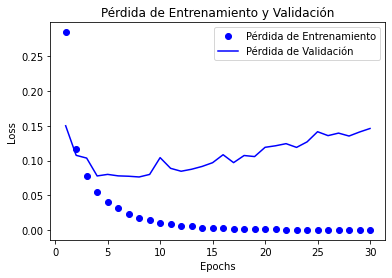

In [13]:
pinta_perdida_entrenamiento_validacion(historia0)

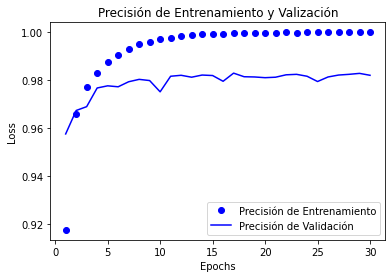

In [14]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [15]:
network1 = crea_modelo(1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 CapaSalida (Dense)          (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
network1 = compila_modelo(network1)

In [17]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1305 - accuracy: 0.8439 - val_loss: 1.0304 - val_accuracy: 0.8786
Epoch 2/30
391/391 [==============================] - 1s 3ms/step - loss: 0.9694 - accuracy: 0.8784 - val_loss: 0.8365 - val_accuracy: 0.9165
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.8465 - accuracy: 0.9004 - val_loss: 0.8730 - val_accuracy: 0.8824
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.7676 - accuracy: 0.9138 - val_loss: 0.7797 - val_accuracy: 0.9033
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7159 - accuracy: 0.9228 - val_loss: 0.6631 - val_accuracy: 0.9387
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6791 - accuracy: 0.9285 - val_loss: 0.6472 - val_accuracy: 0.9396
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6514 - accuracy: 0.9334 - val_loss: 0.6243 - val_accuracy: 0.9407
Epoch 

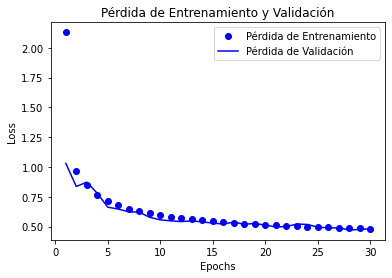

In [18]:
pinta_perdida_entrenamiento_validacion(historia1)

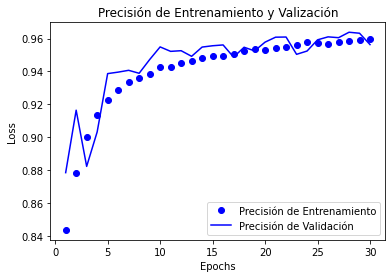

In [19]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [20]:
network2 = crea_modelo(2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 CapaSalida (Dense)          (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [21]:
network2 = compila_modelo(network2)

In [22]:
historia2 = entrena_modelo(network2)

Epoch 1/30
391/391 [==============================] - 2s 5ms/step - loss: 0.5259 - accuracy: 0.9128 - val_loss: 0.3320 - val_accuracy: 0.9427
Epoch 2/30
391/391 [==============================] - 2s 5ms/step - loss: 0.2646 - accuracy: 0.9539 - val_loss: 0.2226 - val_accuracy: 0.9633
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.2110 - accuracy: 0.9629 - val_loss: 0.1966 - val_accuracy: 0.9648
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1862 - accuracy: 0.9675 - val_loss: 0.1777 - val_accuracy: 0.9677
Epoch 5/30
391/391 [==============================] - 2s 5ms/step - loss: 0.1738 - accuracy: 0.9692 - val_loss: 0.1770 - val_accuracy: 0.9686
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1640 - accuracy: 0.9708 - val_loss: 0.1556 - val_accuracy: 0.9733
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1582 - accuracy: 0.9721 - val_loss: 0.1551 - val_accuracy: 0.9742
Epoch 

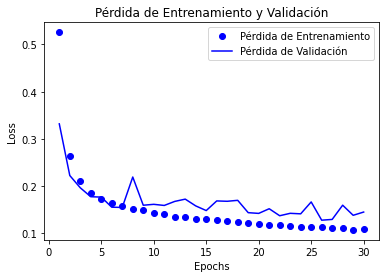

In [23]:
pinta_perdida_entrenamiento_validacion(historia2)

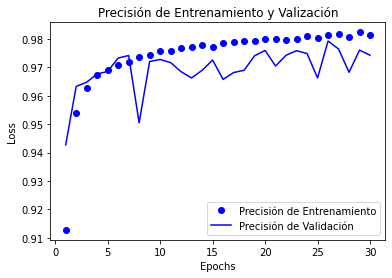

In [24]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [25]:
network3 = crea_modelo(3)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 CapaSalida (Dense)          (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [26]:
network3 = compila_modelo(network3)

In [27]:
historia3 = entrena_modelo(network3)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1543 - accuracy: 0.8447 - val_loss: 0.9977 - val_accuracy: 0.8940
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.9755 - accuracy: 0.8794 - val_loss: 0.8791 - val_accuracy: 0.9052
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.8531 - accuracy: 0.8998 - val_loss: 0.8338 - val_accuracy: 0.8944
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.7774 - accuracy: 0.9137 - val_loss: 0.7373 - val_accuracy: 0.9272
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.7298 - accuracy: 0.9214 - val_loss: 0.7039 - val_accuracy: 0.9251
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.6931 - accuracy: 0.9283 - val_loss: 0.6483 - val_accuracy: 0.9396
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.6635 - accuracy: 0.9331 - val_loss: 0.6413 - val_accuracy: 0.9395
Epoch 

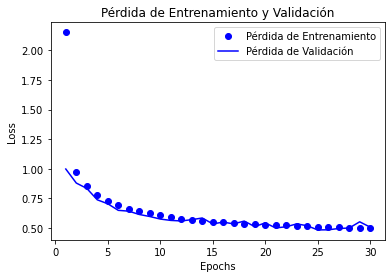

In [28]:
pinta_perdida_entrenamiento_validacion(historia3)

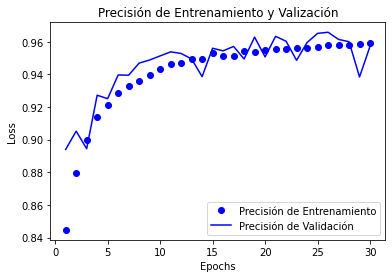

In [29]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [30]:
network4 = crea_modelo(4)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 CapaSalida (Dense)          (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [31]:
network4 = compila_modelo(network4)

In [32]:
historia4 = entrena_modelo(network4)

Epoch 1/30
391/391 [==============================] - 2s 5ms/step - loss: 0.3428 - accuracy: 0.8999 - val_loss: 0.1587 - val_accuracy: 0.9547
Epoch 2/30
391/391 [==============================] - 2s 5ms/step - loss: 0.1663 - accuracy: 0.9506 - val_loss: 0.1150 - val_accuracy: 0.9671
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1264 - accuracy: 0.9620 - val_loss: 0.0975 - val_accuracy: 0.9718
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1038 - accuracy: 0.9697 - val_loss: 0.0905 - val_accuracy: 0.9748
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0926 - accuracy: 0.9723 - val_loss: 0.0890 - val_accuracy: 0.9755
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0806 - accuracy: 0.9758 - val_loss: 0.0822 - val_accuracy: 0.9771
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0747 - accuracy: 0.9775 - val_loss: 0.0815 - val_accuracy: 0.9776
Epoch 

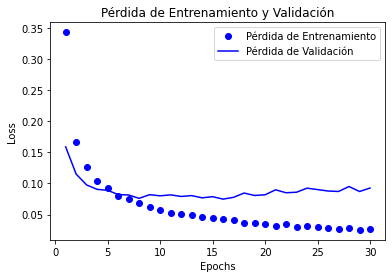

In [33]:
pinta_perdida_entrenamiento_validacion(historia4)

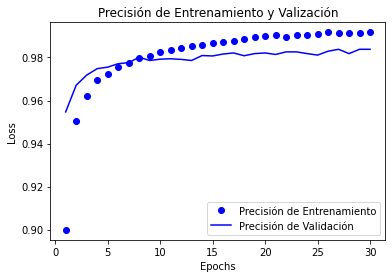

In [34]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [35]:
network5 = crea_modelo(5)

ERROR. No se ha introducido un regulador correcto.


ValueError: ignored

### CONCLUSIONES

El regulador sirve para evitar el sobreentrenamiento de nuestro modelo.

- CASO 0: 
El caso sin regulador se sobreentrena a las pocas épocas (5 epochs) y se puede observar que en la gráfica de pérdida entrenamiento y validación hay mucha diferencia entre los datos de entrenamiento y los de test, y a su vez ocurre lo mismo en la gráfica de precisión de entrenamiento y validación. 

- CASO 1: 
El caso con regularizador l1 observamos que tiene una precision del 0.9563 , sin embargo tiene mucha pérdida 0.4822, por tanto concluimos que no es muy efectivo.
- CASO 2: El caso con regularizador l2 observamos que tiene una precisión del 0.9743 y una pérdida mucho mas baja que la del regulador l1 exactamente de 0.1453. 
- CASO 3: El caso con regularizador l1_l2 observamos que tiene una precisión del 0.9572 y una pérdida mucho mas baja que la del regulador l1 exactamente de 0.5065, por tanto concluimos que no es muy efectivo. 
- CASO 4: El caso del DropOut observamos que tiene una precisión del 0.9838 y una pérdida de 0.0871.

Finalmente concluyo que el caso más efectivo es el DropOut con la mayor precisión de todos y la menor pérdida. Y el regulador que mejor funciona en este modelo es el l2 por su baja pérdida.